In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
clicks_df = pd.read_csv('stud_dates_click.csv')
clicks_df

,code_module,code_presentation,id_student,final_result,-25,-24,-23,-22,-21,-20,...,260,261,262,263,264,265,266,267,268,269
0,AAA,2013J,11391,Pass,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AAA,2013J,28400,Pass,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AAA,2013J,30268,Withdrawn,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AAA,2013J,31604,Pass,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,AAA,2013J,32885,Pass,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,Fail,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32589,GGG,2014J,2645731,Distinction,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32590,GGG,2014J,2648187,Pass,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32591,GGG,2014J,2679821,Withdrawn,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
stud_df = pd.read_csv('./data/studentInfo.csv')
stud_df

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn


In [4]:
# merge three table for further processing
data = pd.merge(stud_df, clicks_df, on=['code_module', 'code_presentation', 'id_student', 'final_result'], how='inner')
data

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,...,260,261,262,263,264,265,266,267,268,269
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# no of records based on age group
data['age_band'].value_counts()

0-35     22944
35-55     9433
55<=       216
Name: age_band, dtype: int64

In [5]:
# change the label of target
data['final_result'] = data['final_result'].map({'Pass':1, 'Distinction':1, 'Withdrawn':0, 'Fail':0})

# split the data into train and test
dataX = data.drop(columns='final_result')
target = data['final_result']
X_train, X_test, y_train, y_test = train_test_split(dataX, target, test_size=0.2, stratify=target)

In [21]:
# data used in training and test
X_train['age_band'].value_counts(), print(), X_test['age_band'].value_counts()

(0-35     18331
 35-55     7564
 55<=       179
 Name: age_band, dtype: int64, None, 0-35     4613
 35-55    1869
 55<=       37
 Name: age_band, dtype: int64)

In [6]:
X_train['result'] = y_train

# age group 0-35
data1 = X_train.query('age_band=="0-35"')
y1 = data1['result']

# age group 35-55
data2 = X_train.query('age_band=="35-55"')
y2 = data2['result']

# age group 55>=
data3 = X_train.query('age_band=="55<="')
y3 = data3['result']

In [7]:
def prepare_data(X, rule='W'):
    
    #clicks data
    cols = [str(i) for i in range(-25, 270)]
    X1 = X[cols]
    X1 = X1.T
    X1.index = pd.date_range(start='1/1/2014', periods=295)
    X1 = X1.resample(rule).sum()
    X1 = X1.T
    
    # age group
    X2 = X['age_band']
            
    return X1, X2

def visualize_loss(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.legend(['Train', 'Validation'])
    plt.show()

In [8]:
# prepare the data
x1, _ = prepare_data(data1)
x2, _ = prepare_data(data2)
x3, _ = prepare_data(data3)

X_test_clicks, age_group = prepare_data(X_test)

# print stastic
print('Train Data:', x1.shape, x2.shape, x3.shape)
print('Test Data: ', X_test_clicks.shape, age_group.shape)
print('Test target count:', Counter(y_test))

Train Data: (18331, 43) (7564, 43) (179, 43)
Test Data:  (6519, 43) (6519,)
Test target count: Counter({0: 3442, 1: 3077})


In [9]:
# change the data into input-format --> (batch_size, time_steps, n_features)
x1 = x1.to_numpy().reshape(x1.shape[0], x1.shape[1], 1)
x2 = x2.to_numpy().reshape(x2.shape[0], x2.shape[1], 1)
x3 = x3.to_numpy().reshape(x3.shape[0], x3.shape[1], 1)

In [10]:
from tensorflow.keras.layers import Dense, Input, Conv1D, AveragePooling1D, Flatten, Add, Multiply, Softmax, LSTM
from tensorflow.keras import layers
from tensorflow.keras import Sequential, Model

# CNN base model

In [11]:
# define model
def define_model():
    clicks_cnn = Sequential()
    clicks_cnn.add(Input(shape=(X_test_clicks.shape[1], 1)))
    clicks_cnn.add(Conv1D(32, kernel_size=2, activation='relu'))
    clicks_cnn.add(layers.BatchNormalization())
    clicks_cnn.add(AveragePooling1D(2))
    clicks_cnn.add(Conv1D(64, kernel_size=2, activation='relu'))
    clicks_cnn.add(layers.BatchNormalization())
    clicks_cnn.add(AveragePooling1D(2))
    clicks_cnn.add(Conv1D(128, kernel_size=2, activation='relu'))
    clicks_cnn.add(layers.BatchNormalization())
    clicks_cnn.add(AveragePooling1D(2))
    clicks_cnn.add(Flatten())
    clicks_cnn.add(Dense(128,  activation='relu'))
    clicks_cnn.add(Dense(64,  activation='relu'))
    clicks_cnn.add(Dense(32,  activation='relu'))
    clicks_cnn.add(Dense(1,  activation='sigmoid'))

    # compile the modela
    clicks_cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return clicks_cnn

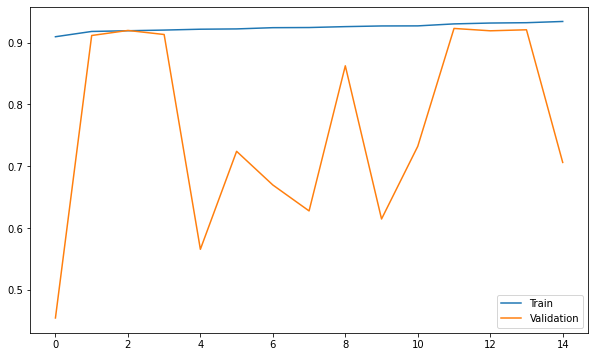

In [12]:
from tensorflow.keras.callbacks import ModelCheckpoint

path1 = 'best_model_1.h5'
callbacks = ModelCheckpoint(path1, save_best_only=True, save_weights_only=True, mode='max', monitor='val_accuracy', verbose=0)

model1 = define_model()
hist = model1.fit(x1, y1, validation_split=0.1, epochs=15, batch_size=32, verbose=0, callbacks=[callbacks])
visualize_loss(hist)

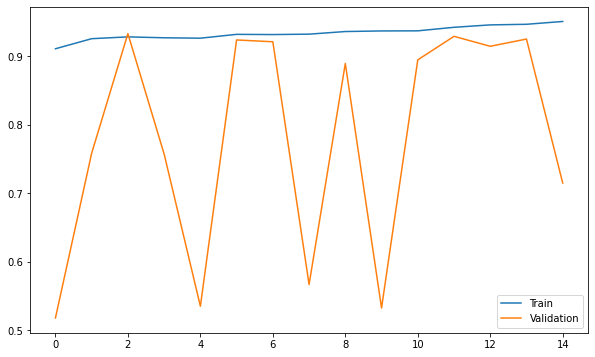

In [13]:
path2 = 'best_model_2.h5'
callbacks = ModelCheckpoint(path2, save_best_only=True, save_weights_only=True, mode='max', monitor='val_accuracy', verbose=0)

model2 = define_model()
hist = model2.fit(x2, y2, validation_split=0.1, epochs=15, batch_size=32, verbose=0, callbacks=[callbacks])
visualize_loss(hist)

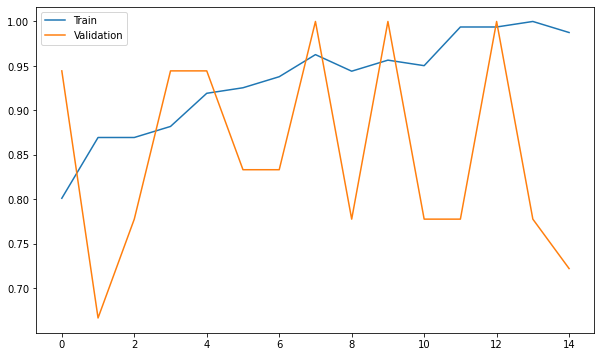

In [14]:
path3 = 'best_model_3.h5'
callbacks = ModelCheckpoint(path3, save_best_only=True, save_weights_only=True, mode='max', monitor='val_accuracy', verbose=0)

model3 = define_model()
hist = model3.fit(x3, y3, validation_split=0.1, epochs=15, batch_size=32, verbose=0, callbacks=[callbacks])
visualize_loss(hist)

In [15]:
prediction = []

# load model
model1.load_weights(path1)
model2.load_weights(path2)
model3.load_weights(path3)

for i in range(len(X_test_clicks)):
    age = age_group.iloc[i]
    if age=='0-35':        
        test = X_test_clicks.iloc[i, :].to_numpy().reshape(1, 43, 1)
        prediction.append(model1.predict(test)[0][0])
    elif age=='35-55':
        test = X_test_clicks.iloc[i, :].to_numpy().reshape(1, 43, 1)
        prediction.append(model2.predict(test)[0][0])
    else:
        test = X_test_clicks.iloc[i, :].to_numpy().reshape(1, 43, 1)
        prediction.append(model3.predict(test)[0][0])

In [16]:
predict = np.array(prediction)
predict = np.where(predict>0.5, 1, 0)
print('Accuracy: ', accuracy_score(predict, y_test))

Accuracy:  0.9205399601165823


In [17]:
print(classification_report(predict, y_test))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      3096
           1       0.97      0.87      0.92      3423

    accuracy                           0.92      6519
   macro avg       0.92      0.92      0.92      6519
weighted avg       0.93      0.92      0.92      6519



In [19]:
pd.DataFrame(confusion_matrix(predict, y_test), index=[0, 1], columns=[0,1])

,0,1
0,3010,86
1,432,2991


# lets tune the model using keras tuner

In [22]:
!pip install keras-tuner
from kerastuner.tuners import RandomSearch

     |████████████████████████████████| 62 kB 966 kB/s eta 0:00:01
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-py3-none-any.whl size=78937 sha256=fa39f6c27e5cdf11693f1fb4aafe6dd91f73c7527bf52447b3c05c72551487b6
  Stored in directory: /home/ramesh/.cache/pip/wheels/53/3d/c3/160c686bd74a18989843fcd015e8f6954ca8d834fd2ef4658a
  Created wheel for terminaltables: filename=terminaltables-3.1.0-py3-none-any.whl size=15354 sha256=e65b764361707eb9316a98f5927a6c3ba76f9d7e3d145f4a1de06fd1747bb071
  Stored in directory: /home/ramesh/.cache/pip/wheels/08/8f/5f/253d0105a55bd84ee61ef0d37dbf70421e61e0cd70cef7c5e1
Successfully built keras-tuner terminaltables
You should consider upgrading via the '/home/ramesh/anaconda3/bin/python -m pip install --upgrade pip' command.


In [29]:
def build_model(hp):
    model = Sequential()
    for i in range(hp.Int('cnn_layers', 1, 3)):
        model.add(Conv1D(filters=hp.Choice('filter_' + str(i), [16, 32, 64, 128]),
                         kernel_size= hp.Choice('kernel_' + str(i), [2, 3, 5, 7]),
                               activation='relu'))
    model.add(Flatten())

    for i in range(hp.Int('cnn_layers', 1, 3)):
        model.add(Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=128,
                                            step=32),
                               activation='relu'))   
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [30]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='tuner',
    project_name='prediction')

In [31]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
cnn_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 3, 'step': 1, 'sampling': None}
filter_0 (Choice)
{'default': 16, 'conditions': [], 'values': [16, 32, 64, 128], 'ordered': True}
kernel_0 (Choice)
{'default': 2, 'conditions': [], 'values': [2, 3, 5, 7], 'ordered': True}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 32, 'sampling': None}


In [33]:
tuner.search(x1, y1,epochs=5,validation_data=(x3, y3))


Search: Running Trial #2

Hyperparameter    |Value             |Best Value So Far 
cnn_layers        |3                 |?                 
filter_0          |64                |?                 
kernel_0          |3                 |?                 
units_0           |96                |?                 



AttributeError: module 'tensorflow._api.v2.distribute' has no attribute 'TPUStrategy'